<a href="https://colab.research.google.com/github/gabrieldimas/machine-learning-study-2023/blob/main/Week8/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tugas Praktikum

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(len(X_train))

print(len(X_test))


60000
10000


In [4]:
feature_vector_length = 784
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
input_shape = (feature_vector_length,)
X_train.shape

(60000, 784)

In [10]:
img_width, img_height = 28, 28
X_train = X_train.reshape(X_train.shape[0],  img_width, img_height,1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height,1)
input_shape = ( img_width, img_height,1,)
X_train.shape

(60000, 28, 28, 1)

In [11]:
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.5385 - accuracy: 0.9192
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0950 - accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0772 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0672 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0645 - accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0582 - accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0544 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0512 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0514 - accuracy: 0.9850
Epoch 10/10
1875/1875 [==============================] - 58s 31m

In [14]:
test_results=model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0402 - accuracy: 0.9899


In [15]:
y_predicted=model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    1,    1,    0,    1,    0,    1,    1,    0],
       [   0, 1129,    0,    0,    0,    1,    0,    2,    3,    0],
       [   1,    0, 1028,    2,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0, 1007,    0,    1,    0,    1,    1,    0],
       [   0,    0,    0,    0,  968,    0,    3,    2,    0,    9],
       [   1,    0,    0,   16,    0,  872,    1,    0,    1,    1],
       [   3,    2,    0,    1,    1,    2,  945,    0,    4,    0],
       [   0,    3,    8,    1,    1,    0,    0, 1015,    0,    0],
       [   1,    0,    0,    3,    1,    3,    1,    0,  964,    1],
       [   0,    0,    1,    0,    7,    2,    0,    0,    2,  997]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

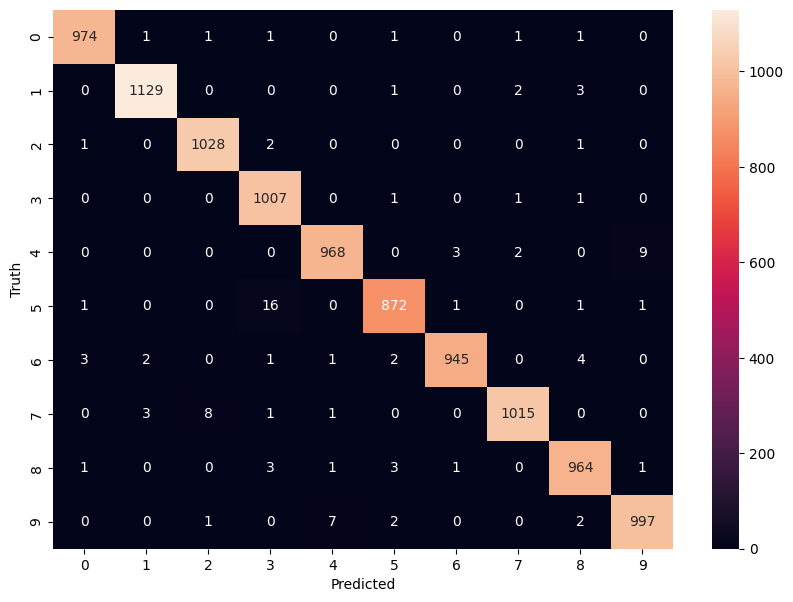

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')